## Somando dois números inteiros em circuitos quânticos
# QFT usando Qiskit

<div class="alert alert-block alert-info">
    
Construindo um Adder Step by Step
</div>

Importando biblioteca básica

In [95]:
import numpy as np
from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.circuit.library import QFT, DraperQFTAdder
from qiskit.visualization import *

   
1. QFT
    
    Dado o estado: $\vert x \rangle \equiv \vert \vec{x} \rangle\equiv \vert x_0 x_1 x_2 \dots x_{n-1}\rangle $
    
    A operação $QFT$ atua da seguinte forma:
    
    $$\vert \tilde x \rangle = QFT \vert x \rangle$$
    
    Onde,
    $$QFT \equiv \sum_{y = 0}^{N - 1} e^{\frac{2\pi i x y}{N}} \vert y\rangle$$
    
    onde $N = 2^n$ e $n$ é igual ao número de qubits do nosso problem.
    
    Abrindo um pouquinho a expressão acima temos:
    $$\vert \tilde x \rangle = e^{\frac{2\pi i x.0}{N}}\vert 0 \rangle + e^{\frac{2\pi i x.1}{N}}\vert 1 \rangle + e^{\frac{2\pi i x.2}{N}}\vert 2 \rangle+ \dots + e^{\frac{2\pi i x.(N-1)}{N}}\vert N-1 \rangle$$
    
    Onde cada estado acima é a representação inteira de uma string binária, como exemplificado abaixo:
    
    $$\vert 0 \rangle \equiv \vert 0_{0}0_1 \dots 0_{N - 1} \rangle$$
    $$\vert 1 \rangle \equiv \vert 1_{0} 0_1 \dots 0_{N - 1} \rangle$$
    $$\dots$$
    $$\vert N - 1 \rangle \equiv \vert 1_{0} 1_1 \dots 1_{N - 1} \rangle$$

2. Reescrevendo a expressão do QFT.
    Uma vez que $\vert y \rangle = \vert y_{0} y_1 y_2 \dots y_{N-1} \rangle$, onde $y$ é a presentação inteira da representção binária $\vert y_{0} y_1 y_2 \dots y_{N-1} \rangle$.
    
    Temos:
    
    $$y = 2^{n - 1}y_{0} + 2^{n - 2}y_{1} + \dots + 2^{0}y_{n - 1}$$
    
    Podemos então reescrever o somário do $QFT$ como sendo:
    
    $$\sum_{y = 0}^{N - 1} \to \sum_{y_0 = 0}^{1} \sum_{y_1 = 0}^{1} \sum_{y_2 = 0}^{1} \dots \sum_{y_{N -1} = 0}^{1}$$

    Nossa expressão para o QFT pode ser então reescrita como:
    
    $$\vert \tilde x \rangle = \sum_{y_0 = 0}^{1} \sum_{y_1 = 0}^{1} \sum_{y_2 = 0}^{1} \dots \sum_{y_{N -1} = 0}^{1} e^{\frac{2\pi i x}{2^n} \sum_{k = 0}^{n-1} 2^{n-k-1} y_{k}} \vert y_0\rangle \otimes \vert y_1\rangle \otimes \dots\otimes \vert y_{n -1} \rangle$$
    
    Note que:
    
    $$ e^{\frac{2\pi i x}{2^n} \sum_{k = 0}^{n-1} 2^{n-k-1} y_{k}} = e^{\frac{2\pi i x 2^n}{2^n} \sum_{k = 0}^{n-1}\frac{y_{k}}{2^{k + 1}}} = e^{2\pi i x \sum_{k = 0}^{n-1}\frac{y_{k}}{2^{k + 1}}}$$  
    Portanto,
    
    $$e^{\frac{2\pi i x 2^n}{2^n} \left[\frac{y_{0}}{2^{1}} + \frac{y_{1}}{2^{2}} + \dots + \frac{y_{n - 1}}{2^{n}} \right]} = \prod_{k=0}^{n-1} e^{\frac{2 \pi i x y_k}{2^{k + 1}}}$$
    
    
   
    
    
</div>  

### Construindo QFT Step by Step

**_Vamos primeiro construir os building blocks para depois juntar as peças_**



1. QFT (um pouco da teoria)
    
    Dado o estado: $\vert x \rangle \equiv \vert \vec{x} \rangle\equiv \vert x_0 x_1 x_2 \dots x_{n-1}\rangle $
    
    A operação $QFT$ atua da seguinte forma:
    
    $$\vert \tilde x \rangle = QFT \vert x \rangle$$
    
    Onde,
    $$QFT \equiv \frac{1}{\sqrt{N}}\sum_{y = 0}^{N - 1} e^{\frac{2\pi i x y}{N}} \vert y\rangle$$
    
    onde $N = 2^n$ e $n$ é igual ao número de qubits do nosso problem.
    
    Abrindo um pouquinho a expressão acima temos:
    $$\vert \tilde x \rangle =  \frac{1}{\sqrt{N}}\left( e^{\frac{2\pi i x.0}{N}}\vert 0 \rangle + e^{\frac{2\pi i x.1}{N}}\vert 1 \rangle + e^{\frac{2\pi i x.2}{N}}\vert 2 \rangle+ \dots + e^{\frac{2\pi i x.(N-1)}{N}}\vert N-1 \rangle \right)$$
    
    Onde cada estado acima é a representação inteira de uma string binária, como exemplificado abaixo:
    
    $$\vert 0 \rangle \equiv \vert 0_{0}0_1 \dots 0_{N - 1} \rangle$$
    $$\vert 1 \rangle \equiv \vert 1_{0} 0_1 \dots 0_{N - 1} \rangle$$
    $$\dots$$
    $$\vert N - 1 \rangle \equiv \vert 1_{0} 1_1 \dots 1_{N - 1} \rangle$$

2. Reescrevendo a expressão do QFT.
    Uma vez que $\vert y \rangle = \vert y_{0} y_1 y_2 \dots y_{N-1} \rangle$, onde $y$ é a presentação inteira da representção binária $\vert y_{0} y_1 y_2 \dots y_{N-1} \rangle$.
    
    Temos:
    
    $$y = 2^{n - 1}y_{0} + 2^{n - 2}y_{1} + \dots + 2^{0}y_{n - 1}$$
    
    Podemos então reescrever o somário do $QFT$ como sendo:
    
    $$\sum_{y = 0}^{N - 1} \to \sum_{y_0 = 0}^{1} \sum_{y_1 = 0}^{1} \sum_{y_2 = 0}^{1} \dots \sum_{y_{N -1} = 0}^{1}$$

    Nossa expressão para o QFT pode ser então reescrita como:
    
    $$\vert \tilde x \rangle = \sum_{y_0 = 0}^{1} \sum_{y_1 = 0}^{1} \sum_{y_2 = 0}^{1} \dots \sum_{y_{N -1} = 0}^{1} e^{\frac{2\pi i x}{2^n} \sum_{k = 0}^{n-1} 2^{n-k-1} y_{k}} \vert y_0\rangle \otimes \vert y_1\rangle \otimes \dots\otimes \vert y_{n -1} \rangle$$
    
    Note que:
    
    $$ e^{\frac{2\pi i x}{2^n} \sum_{k = 0}^{n-1} 2^{n-k-1} y_{k}} = e^{\frac{2\pi i x 2^n}{2^n} \sum_{k = 0}^{n-1}\frac{y_{k}}{2^{k + 1}}} = e^{2\pi i x \sum_{k = 0}^{n-1}\frac{y_{k}}{2^{k + 1}}}$$  
    Portanto,
    
    $$e^{\frac{2\pi i x 2^n}{2^n} \left[\frac{y_{0}}{2^{1}} + \frac{y_{1}}{2^{2}} + \dots + \frac{y_{n - 1}}{2^{n}} \right]} = \prod_{k=0}^{n-1} e^{\frac{2 \pi i x y_k}{2^{k + 1}}}$$
    
    Podemos agora reescrever nossa função final para $QFT$:
    
    $$\vert \tilde x \rangle =  \frac{1}{\sqrt{N}} \sum_{y_0 = 0}^{1} e^{\frac{2 \pi i x y_0}{2^{1}}}\vert y_0 \rangle \otimes \sum_{y_1 = 0}^{1} e^{\frac{2 \pi i x y_1}{2^{2}}} \vert y_1 \rangle \otimes \sum_{y_2 = 0}^{1} e^{\frac{2 \pi i x y_2}{2^{3}}} \vert y_2 \rangle \otimes \dots \otimes \sum_{y_{n -1}}^{1} e^{\frac{2 \pi i x y_{n-1}}{2^{n}}} \vert y_{n-1} \rangle$$
    
    Podemos abrir cada um dos somatórios acima e finalmente chegamos à seguinte expressão:
    
    $$\vert \tilde x \rangle =  \frac{1}{\sqrt{N}} \left[\vert 0 \rangle + e^{\frac{2 \pi i x}{2^{1}}}  \vert 1 \rangle \right]\otimes \left[\vert 0 \rangle + e^{\frac{2 \pi i x}{2^{2}}}  \vert 1 \rangle \right]\otimes \dots \otimes \left[\vert 0 \rangle + e^{\frac{2 \pi i x}{2^{n}}}  \vert 1 \rangle \right]$$
    
    Podemos interpretar cada elemento entre $[\dots]$ como sendo um elemento do estado $\vert \tilde x \rangle$, tal que:
    
    $$\vert \tilde x_1 \rangle =  \frac{1}{\sqrt{2}}\left[\vert 0 \rangle + e^{\frac{2 \pi i x}{2^{1}}}  \vert 1 \rangle \right] $$
    $$\vert \tilde x_2 \rangle =  \frac{1}{\sqrt{2}}\left[\vert 0 \rangle + e^{\frac{2 \pi i x}{2^{2}}}  \vert 1 \rangle \right] $$
    $$\dots$$
    $$\vert \tilde x_n \rangle =  \frac{1}{\sqrt{2}}\left[\vert 0 \rangle + e^{\frac{2 \pi i x}{2^{n}}}  \vert 1 \rangle \right] $$
    
    
    
   
    
    



<div class="alert alert-block alert-info">

**Como contruir (QFT) em um circuito quântico ?**
    
   Para isso, vamos definiar dois Gates:
   1. Hadamard
   
   $$H\vert x_k \rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_k\right)\vert1\rangle\right)$$


   2. CROT_k é uma rotação controlada - gate de dois qubits

$$CROT_k\equiv CP_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]$$

onde 

$$UROT_k\equiv P(\lambda) = \left[\begin{matrix}
1&0\\
0&\exp\left(i\lambda_k\right)\\
\end{matrix}\right]$$

onde $P(\lambda_k)\to$ Phase Gate e  $$\lambda_k = \frac{2\pi}{2^k}$$
    
A ação de $CROT_k$ em um estado de dois qubtis $\vert x_l x_j\rangle$ onde o primeiro qubit é o controle e o segundo é o target. 



$$CROT_k\vert 0x_j\rangle = \vert 0x_j\rangle$$


e


$$CROT_k\vert 1x_j\rangle = \exp\left( \frac{2\pi i}{2^k}x_j \right)\vert 1x_j\rangle$$


    
</div> 

### Para exemplificar a construção do algoritmo $QFT$ vamos olhar para um estado de $3$ qubits

Vamos calcular a Transforma de Fourier para o estado $\vert x_3x_2x_1\rangle$ dada por $\vert \tilde x_3 \tilde x_2 \tilde x_1\rangle = QFT\vert x_3x_2x_1\rangle$:

<ol>
<li> Aplicar Hadamard em $\vert x_1 \rangle$

$$
|\psi_1\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(\frac{2\pi i}{2}x_1\right) 
\vert1\rangle\right]
$$

<li> Aplicar $UROT_2$ em $\vert x_1\rangle$ controlado por $\vert x_2\rangle$

$$
|\psi_2\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> Aplicar $UROT_3$ em $\vert x_1\rangle$ controlado por $\vert x_3\rangle$

$$
|\psi_3\rangle = 
\vert x_3\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> Aplicar Hadamard a $\vert x_2 \rangle$

$$
|\psi_4\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> Aplicar $UROT_2$ a $\vert x_2\rangle$ controlado por $\vert x_3\rangle$

$$
|\psi_5\rangle = 
\vert x_3\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$

<li> Aplicar Hadamard a $\vert x_3\rangle$

$$
|\psi_6\rangle = 
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$


<!-- <li> Keep in mind the reverse order of the output state relative to the desired QFT. Therefore, we must reverse the order of the qubits (in this case swap $y_1$ and $y_3$). -->



-----------------------------------------------------
Circuito que computa transformada quântica de Fourier


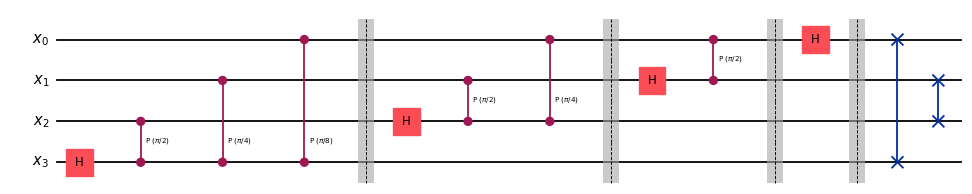

In [94]:
print("-----------------------------------------------------")
print("Circuito que computa transformada quântica de Fourier")

n = 4 #números de qubits
qr = QuantumRegister(n,'x') #Quantum Register x
qc = QuantumCircuit(qr) # Circuito quântico

#Aplicando Hadamard e CP (control phase gate) conforme especificado anteriormente
for i in range(n-1,-1,-1):
    qc.h(i)
    for j in range(i-1, -1, -1):
        qc.cp(np.pi/(2**(i - j)), i,j)
    qc.barrier()
for qubit in range(n//2):
    qc.swap(qubit, n-qubit-1) #invertendo ordem dos qubits

qc.draw('mpl',scale = 0.9, style = 'iqx') #Desenhando circuito

-----------------------------------------------------
Circuito que computa transformada quântica de Fourier Inversa


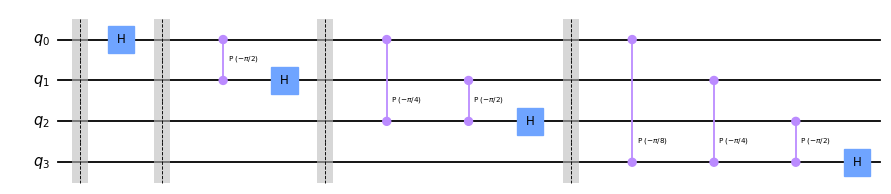

In [96]:
print("-----------------------------------------------------")
print("Circuito que computa transformada quântica de Fourier Inversa")
n = 4
qc = QuantumCircuit(n)
for i in range(n-1,-1,-1):
    qc.h(i)
    for j in range(i-1, -1, -1):
        qc.cp(np.pi/(2**(i - j)), i,j)
    qc.barrier()
    
qc = qc.inverse()
qc.draw('mpl', scale = 0.9)

### $QFT$ and $QFT^{-1}$ functions

In [97]:
def qft(n):
    qc = QuantumCircuit(n)
    for i in range(n-1,-1,-1):
        qc.h(i)
        for j in range(i-1, -1, -1):
            qc.cp(np.pi/(2**(i - j)), i,j)
    gate = qc.to_gate(label = ' QFT')
    return gate

def iqft(n):
    qc = QuantumCircuit(n)
    qc.append(qft(n), range(n))
    qc = qc.inverse()
    gate = qc.to_gate(label = ' $IQFT$')
    return gate
def phase(n):
    qc = QuantumCircuit(n)
    for j in range(len(qa)):
        for i in range(j,len(qb)):
            qc.cp(2*np.pi/2**(i + 1 - j), qa[j], qb[i])
        qc.barrier()

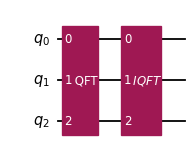

In [101]:
n = 3
qc = QuantumCircuit(n)
qc.append(qft(n), range(n))
qc.append(iqft(n), range(n))

qc.draw('mpl', style='iqx', scale = .9)